# K-Nearest Neighbors Classifier

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import io
import requests
import pandas as pd
from pathlib import Path

In [2]:
### This is the local file path, but we decided to use an S3 bucket instead
# readpath = Path.cwd() / 'Data' / 'heart_failure_clinical_records_dataset.csv'
url="https://final-project-heart.s3.amazonaws.com/heart_failure_clinical_records_dataset.csv"
s=requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Formatting Dataset for Models

In [3]:
target = df["DEATH_EVENT"]
target_names = ["living", "deceased"]
data = df.drop("DEATH_EVENT", axis=1)
feature_names = data.columns
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=3)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


### All Features

In [4]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)
predict_train = neigh.predict(X_train)
predict_test = neigh.predict(X_test)
report = classification_report(y_test, predict_test, target_names=target_names, output_dict=True)
neigh_report = pd.DataFrame(report).T
neigh_report.to_html('./templates/KNN_all_features_report.html')
neigh_report.to_csv('./Data/KNN_all_features_report.csv')
print(confusion_matrix(y_test, predict_test))
neigh_report.head()

[[43  7]
 [20  5]]


,precision,recall,f1-score,support
living,0.682540,0.86,0.761062,50.00
deceased,0.416667,0.20,0.270270,25.00
accuracy,0.640000,0.64,0.640000,0.64
macro avg,0.549603,0.53,0.515666,75.00
weighted avg,0.593915,0.64,0.597465,75.00


In [5]:
neigh.score(X_train, y_train)

0.7589285714285714

In [8]:
train = []
test = []
for x in range(40):
    neigh = KNeighborsClassifier(n_neighbors=x+1)
    neigh.fit(X_train, y_train)
    train.append(neigh.score(X_train, y_train))
    test.append(neigh.score(X_test, y_test))
    print(f"Number of Neighbors: {x+1}")

Number of Neighbors: 1
Number of Neighbors: 2
Number of Neighbors: 3
Number of Neighbors: 4
Number of Neighbors: 5
Number of Neighbors: 6
Number of Neighbors: 7
Number of Neighbors: 8
Number of Neighbors: 9
Number of Neighbors: 10
Number of Neighbors: 11
Number of Neighbors: 12
Number of Neighbors: 13
Number of Neighbors: 14
Number of Neighbors: 15
Number of Neighbors: 16
Number of Neighbors: 17
Number of Neighbors: 18
Number of Neighbors: 19
Number of Neighbors: 20
Number of Neighbors: 21
Number of Neighbors: 22
Number of Neighbors: 23
Number of Neighbors: 24
Number of Neighbors: 25
Number of Neighbors: 26
Number of Neighbors: 27
Number of Neighbors: 28
Number of Neighbors: 29
Number of Neighbors: 30
Number of Neighbors: 31
Number of Neighbors: 32
Number of Neighbors: 33
Number of Neighbors: 34
Number of Neighbors: 35
Number of Neighbors: 36
Number of Neighbors: 37
Number of Neighbors: 38
Number of Neighbors: 39
Number of Neighbors: 40


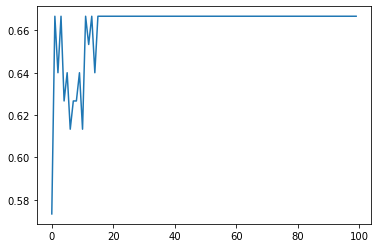

In [7]:
plt.plot(test)
test_df = pd.DataFrame(data=test)

### Patient Known Features

In [5]:
patient_known_data = df.drop(["time",
                              "creatinine_phosphokinase", 
                              "ejection_fraction", 
                              "platelets", 
                              "serum_creatinine", 
                              "serum_sodium", 
                              "DEATH_EVENT"], axis=1)
feature_names = patient_known_data.columns
patient_known_data.head()

,age,anaemia,diabetes,high_blood_pressure,sex,smoking
0,75.0,0,0,1,1,0
1,55.0,0,0,0,1,0
2,65.0,0,0,0,1,1
3,50.0,1,0,0,1,0
4,65.0,1,1,0,0,0


In [6]:
X_train_kd, X_test_kd, y_train_kd, y_test_kd = train_test_split(patient_known_data, target, test_size=0.20, random_state=4)

In [22]:
neigh_kd = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_kd,y_train_kd)
predict_train = neigh.predict(X_train_kd)
predict_test = neigh.predict(X_test_kd)
report = classification_report(y_test_kd, predict_test, target_names=target_names, output_dict=True)
neigh_report = pd.DataFrame(report).T

In [23]:
print(confusion_matrix(y_test_kd, predict_test))
neigh_report.head()

[[35  7]
 [14  4]]


,precision,recall,f1-score,support
living,0.714286,0.833333,0.769231,42.00
deceased,0.363636,0.222222,0.275862,18.00
accuracy,0.650000,0.650000,0.650000,0.65
macro avg,0.538961,0.527778,0.522546,60.00
weighted avg,0.609091,0.650000,0.621220,60.00


In [25]:
neigh_report.to_html('./templates/KNN_patient_known_features_report.html')
neigh_report.to_csv('./Data/KNN_patient_known_features_report.csv')